[[ 8  1]
 [ 9  5]
 [ 8  3]
 [ 6  3]
 [10  3]
 [ 9  3]
 [ 8  3]
 [ 9  2]
 [ 9  3]
 [10  3]
 [ 9  1]
 [ 8  1]
 [ 7  4]
 [ 6  1]
 [ 9  2]
 [ 8  3]]
[[3 1]
 [3 1]
 [4 1]
 [3 1]
 [0 5]
 [1 5]
 [2 3]
 [3 2]]


/home/alexz/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


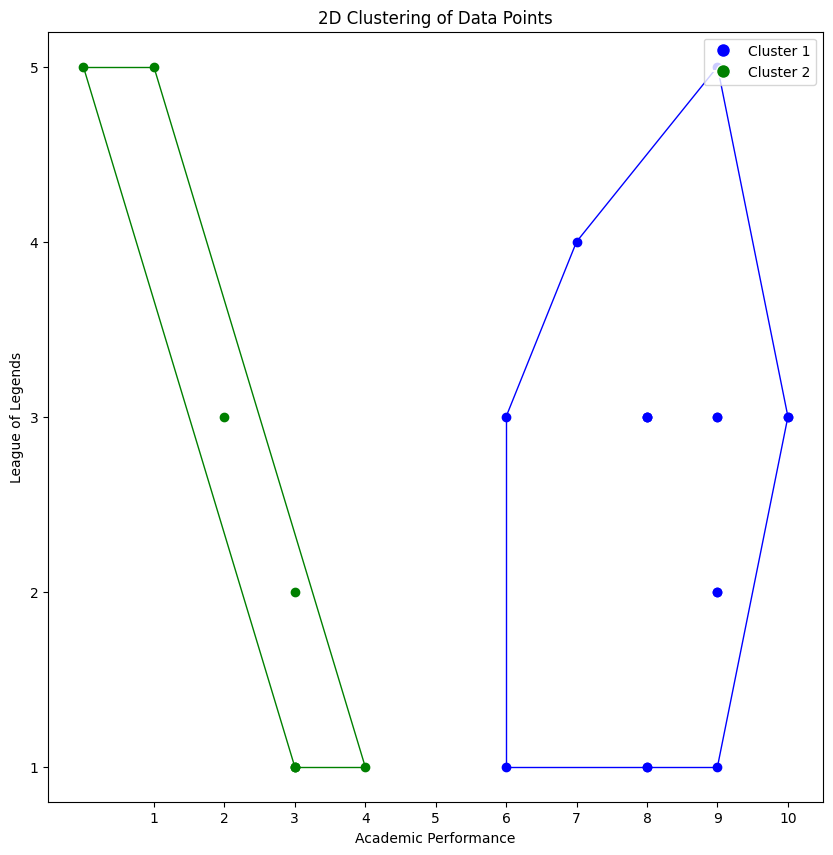

In [27]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.spatial import ConvexHull
from matplotlib import animation
from IPython.display import HTML
from IPython.display import display
from collections import Counter

%matplotlib inline
league_of_legends = [1, 5, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 4, 1, 1, 1, 2, 3, 5]
enjoy_school =      [8, 9, 8, 6, 10, 9, 8, 9, 9, 10, 9, 3, 3, 8, 7, 4, 6, 3, 9, 8, 0]

league_of_legends.extend([5, 3, 2])
enjoy_school.extend([1, 2, 3])

data = np.array([enjoy_school, league_of_legends]).T

# Create a KMeans clustering model
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

colors = ['b', 'g', 'r']

# Create a 2D scatter plot
fig, ax = plt.subplots(figsize=(10, 10))
for label in range(2):  
    cluster_points = data[labels == label]
    ax.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[label])

ax.set_xlabel('Academic Performance')
ax.set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_ylabel('League of Legends')

# Optionally add cluster borders
for label in range(2):
    cluster_points = data[labels == label]
    print(cluster_points)
    hull = ConvexHull(cluster_points)
    for simplex in hull.simplices:
        simplex_points = cluster_points[simplex]
        ax.add_patch(Polygon(simplex_points[:, :2], fill=False, color=colors[label]))

# Set the legend
cluster_lines = [
    plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {label+1}', 
               markersize=10, markerfacecolor=colors[label])
    for label in range(2)
]
ax.legend(handles=cluster_lines, loc='upper right')

# Add title
ax.set_title('2D Clustering of Data Points')

plt.show()

In [12]:
len(league_of_legends)

24

In [17]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1], dtype=int32)